In [1]:
import requests
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
seasons = np.arange(1889,2020)

In [3]:
game_data = []

for season in seasons:
    parameters = {"year": season, "seasonType": "regular", "team": "Washington"}
    response = requests.get("https://api.collegefootballdata.com/games", params=parameters)
    games = response.json()
    for game in games:
        if (game["home_team"] == "Michigan" or game["away_team"] == "Michigan"):
            game_data.append(game)
    parameters = {"year": season, "seasonType": "postseason", "team": "Washington"}
    response = requests.get("https://api.collegefootballdata.com/games", params=parameters)
    games = response.json()
    for game in games:
        if (game["home_team"] == "Michigan" or game["away_team"] == "Michigan"):
            game_data.append(game)

In [4]:
game_data

[{'id': 31481,
  'season': 1953,
  'week': 2,
  'season_type': 'regular',
  'start_date': '1953-09-26T00:00:00.000Z',
  'start_time_tbd': None,
  'neutral_site': False,
  'conference_game': None,
  'attendance': None,
  'venue_id': None,
  'venue': None,
  'home_id': 130,
  'home_team': 'Michigan',
  'home_conference': 'Big Ten',
  'home_points': 50,
  'home_line_scores': [],
  'home_post_win_prob': None,
  'away_id': 264,
  'away_team': 'Washington',
  'away_conference': 'Pacific',
  'away_points': 0,
  'away_line_scores': [],
  'away_post_win_prob': None,
  'excitement_index': None},
 {'id': 32056,
  'season': 1954,
  'week': 2,
  'season_type': 'regular',
  'start_date': '1954-09-25T00:00:00.000Z',
  'start_time_tbd': None,
  'neutral_site': False,
  'conference_game': None,
  'attendance': None,
  'venue_id': None,
  'venue': None,
  'home_id': 264,
  'home_team': 'Washington',
  'home_conference': 'Pacific',
  'home_points': 0,
  'home_line_scores': [],
  'home_post_win_prob': Non

In [5]:
len(game_data)

12

In [6]:
game_df = json_normalize(game_data)
game_df.head()

C:\Users\wwtar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,home_points,home_line_scores,home_post_win_prob,away_id,away_team,away_conference,away_points,away_line_scores,away_post_win_prob,excitement_index
0,31481,1953,2,regular,1953-09-26T00:00:00.000Z,None,False,None,NaN,NaN,...,50,[],None,264,Washington,Pacific,0,[],None,None
1,32056,1954,2,regular,1954-09-25T00:00:00.000Z,None,False,None,NaN,NaN,...,0,[],None,130,Michigan,Big Ten,14,[],None,None
2,41264,1969,3,regular,1969-09-27T00:00:00.000Z,None,False,None,NaN,NaN,...,45,[],None,264,Washington,Pac-8,7,[],None,None
3,41951,1970,5,regular,1970-09-26T00:00:00.000Z,None,False,None,NaN,NaN,...,3,[],None,130,Michigan,Big Ten,17,[],None,None
4,48018,1977,1,postseason,1978-01-02T00:00:00.000Z,None,True,None,NaN,NaN,...,27,[],None,130,Michigan,Big Ten,20,[],None,None


In [7]:
season = []
team = []
points = []

for index, row in game_df.iterrows(): 
    season.append(row["season"])
    team.append(row["home_team"])
    points.append(row["home_points"])
    season.append(row["season"])
    team.append(row["away_team"])
    points.append(row["away_points"])

games = pd.DataFrame()
games["season"] = season
games["team"] = team
games["points"] = points

In [8]:
games.head()

,season,team,points
0,1953,Michigan,50
1,1953,Washington,0
2,1954,Washington,0
3,1954,Michigan,14
4,1969,Michigan,45


In [10]:
games.loc[games.team == "Michigan", "points"] *= -1

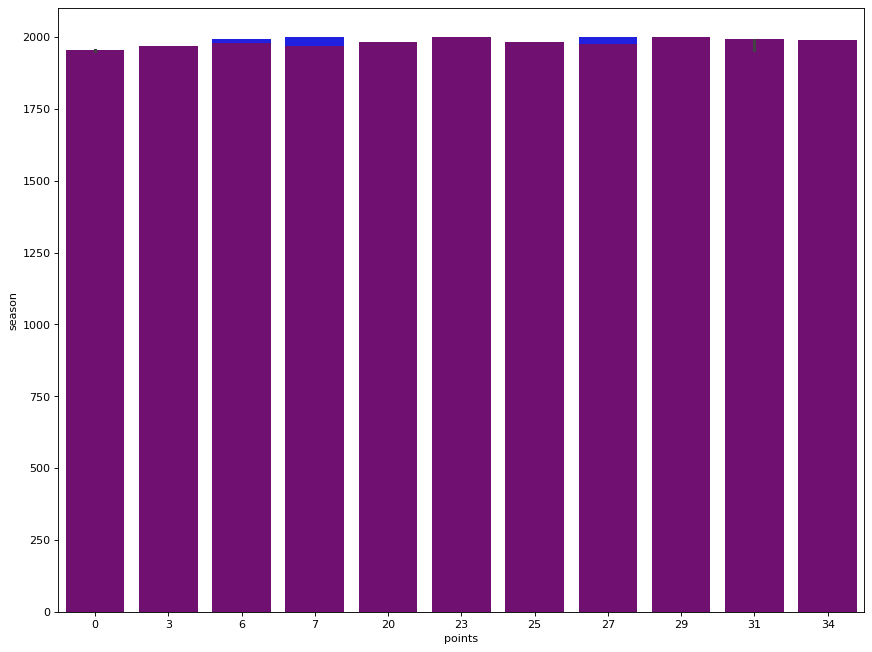

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,10), dpi= 80)
group_col = 'team'
order_of_bars = games.season.unique()
colors = ["blue", "purple"]

for c, group in zip(colors, games[group_col].unique()):
    sns.barplot(x='points', y='season', data=games.loc[games[group_col]==group, :], color=c, label=group)

# # Decorations    
# plt.xlabel("Users")
# plt.ylabel("Stage of Purchase")
# plt.yticks(fontsize=12)
# plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
# plt.legend()
# plt.show()

In [12]:
season = []
wa_points = []
mich_points = []

for index, row in game_df.iterrows(): 
    season.append(row["season"])
    if(row["home_team"] == "Washington"):
        wa_points.append(row["home_points"])
        mich_points.append(row["away_points"] * -1)
    else:
        wa_points.append(row["away_points"])
        mich_points.append(row["home_points"] * -1)

games = pd.DataFrame()
games["season"] = season
games["wa_points"] = wa_points
games["mich_points"] = mich_points

In [22]:
games.head()

,season,wa_points,mich_points
0,1953,0,-50
1,1954,0,-14
2,1969,7,-45
3,1970,3,-17
4,1977,27,-20


In [27]:
points = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

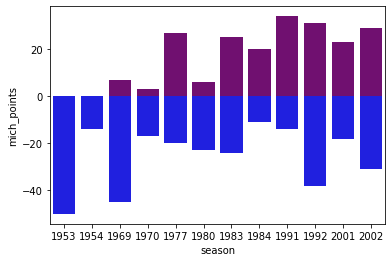

In [23]:
bar_plot = sns.barplot(x='season', y='wa_points', data=games, order=season, lw=0, color="purple")
bar_plot = sns.barplot(x='season', y='mich_points', data=games, order=season, lw=0, color="blue")